# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [2]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Questoin 1
Scatter plot the dataset

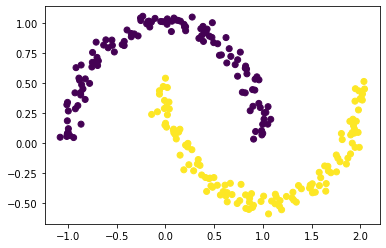

In [9]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

In [ ]:
# KMeans clustering on a non-globular dataset don’t capture the actual semantics in the above dataset.
# K-Means would capture better structural semantics for the globular data(spherical) and having a center
# but doesnt work well on non-centrailized shapes ( does not have a clear center)
# KMeans clustering will perform better on a dataset with a clear center

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

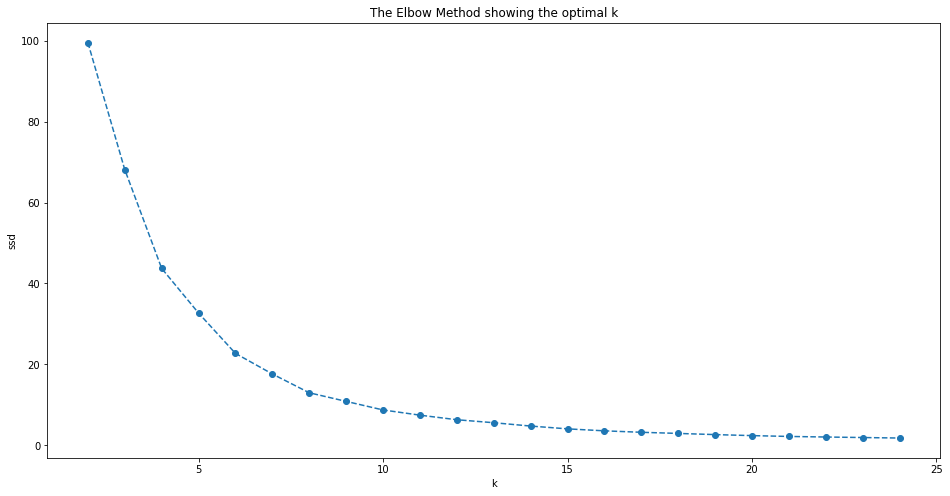

Best K=  8


In [19]:
from kneed import KneeLocator
ssd=[]
for k in range(2,25):
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(2,25),ssd,'o--')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('The Elbow Method showing the optimal k')
plt.show()
k= KneeLocator(range(2, 25),ssd, curve="convex", direction="decreasing")
print("Best K= ", k.elbow)

Text(0.5, 1.0, 'K_Means best')

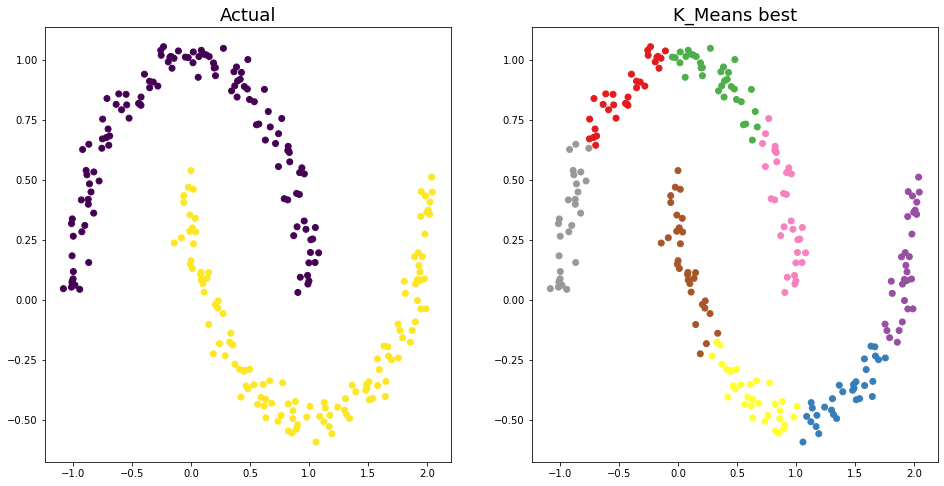

In [62]:
kmeanModel = KMeans(n_clusters=8)
k_means=kmeanModel.fit_predict(X)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[1].scatter(X[:,0], X[:,1], c=k_means, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means best', fontsize=18)

Text(0.5, 1.0, 'K_Means')

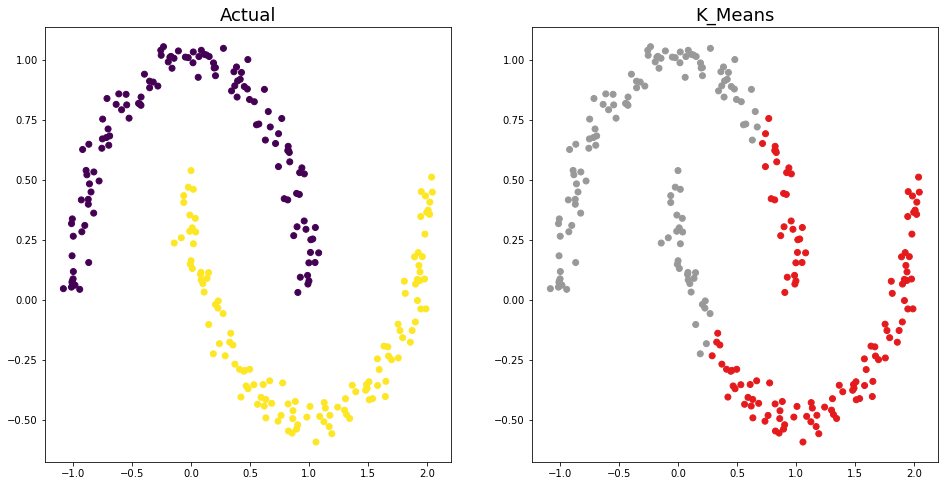

In [21]:
kmeanModel = KMeans(n_clusters=2)
k_means=kmeanModel.fit_predict(X)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[1].scatter(X[:,0], X[:,1], c=k_means, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [ ]:
# at K=2 the end of the first half of the moon where there is overlapping the classfier got confused
# and clustered it with the other half of the moon as it classified according to the nearest
# At k = 8; each half moon is clustered into 4 clusters with no overlapping and classified correctly

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

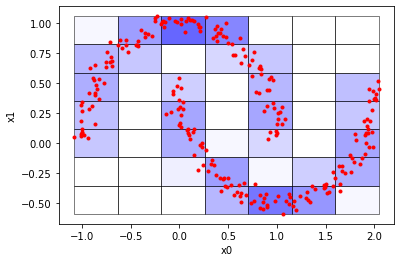

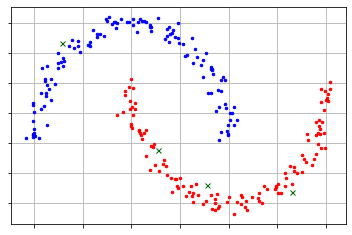

Number of clusters: 2


In [3]:
# At Threshold = 1 and interval = 7 gives the best result  and cluster the data into two clusters
clique_instance = clique(X, 7, 1)
clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise() 
cells = clique_instance.get_cells()
clique_visualizer.show_grid(cells, X)
clique_visualizer.show_clusters(X, clusters, noise)
print("Number of clusters:", len(clusters))
# Clique find overlapping clusters as one datapoint can belong to more than one cluster
# while KMeans clustering on a non-globular dataset don’t capture the actual semantics in the above dataset
# as it doesnt work well on non-centrailized shapes( does not have a clear center)

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

In [51]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

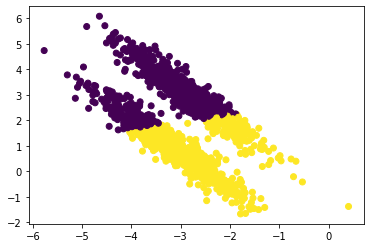

In [56]:
kmeanModel = KMeans(n_clusters=2)
k_means=kmeanModel.fit_predict(X_aniso)
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=k_means)

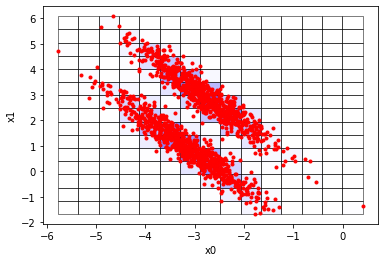

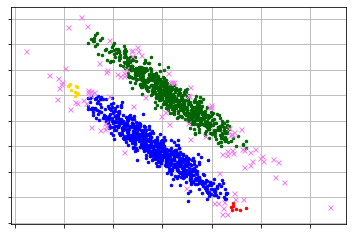

Number of clusters: 4


In [53]:
clique_instance = clique(X_aniso, 15, 6)
clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise() 
cells = clique_instance.get_cells()
clique_visualizer.show_grid(cells, X_aniso)
clique_visualizer.show_clusters(X_aniso, clusters, noise)
print("Number of clusters:", len(clusters))

In [ ]:
# 4)1) The number of clusters in case of clique is 4 because some points are far and considered as outliers
# by changing the threshold it can reduce the splitting cluster the data into two clusters which is better than 4

#4)2)because K-mean clustering split the data according to distance from centroid which resulted as shown in the figure in 
# upper and lower parts

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [50]:
import numpy as np
def PCA(X, n_components ):
    X_mean = X - np.mean(X , axis = 0) 
    cov_mat = np.cov(X_mean , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eig(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    print(eigenvector_subset)
    X_reduced = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()
    return X_reduced, sorted_eigenvectors, sorted_eigenvalues

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [59]:
def kMeans(X, K, maxIterations = 20):
    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    for i in range(maxIterations):
        C = np.array([np.argmin([np.sqrt(np.sum(np.square(xI - yK))) for yK in centroids]) for xI in X])
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    return np.array(centroids)

center1 = np.array([2,2])
center2 = np.array([7,7])
center3 = np.array([8,1])

cluster1 = np.random.randn(100, 2) + center1
cluster2 = np.random.randn(100,2) + center2
cluster3 = np.random.randn(100,2) + center3

data = np.concatenate((cluster1, cluster2, cluster3), axis = 0)
print(kMeans(data,3))

[[1.81198293 1.98540426]
 [7.21857036 6.71125906]
 [8.21761135 0.87301837]]
